**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/1YK1i5xr3XhNVM0jZPPyjq4TbA6yVeqhX?usp=sharing)

Авторский репозиторий (Pytorch: [CycleGAN-and-pix2pix](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix))

<h1><b> Введение </b></h1>

**Cycle Generative adversial Network** (CycleGAN или Циклическая генеративно-состязательная нейронная сеть) - предназначена для трансформации исходного изображения в изображение из другого набора данных.

<i>К примеру, она может трансформировать изображение лошади в зебру или пейзаж ночного города в пейзаж дневного, так же может превращать обычные фотографии в картины знаменитых художников, зиму в лето и т.д.</i>

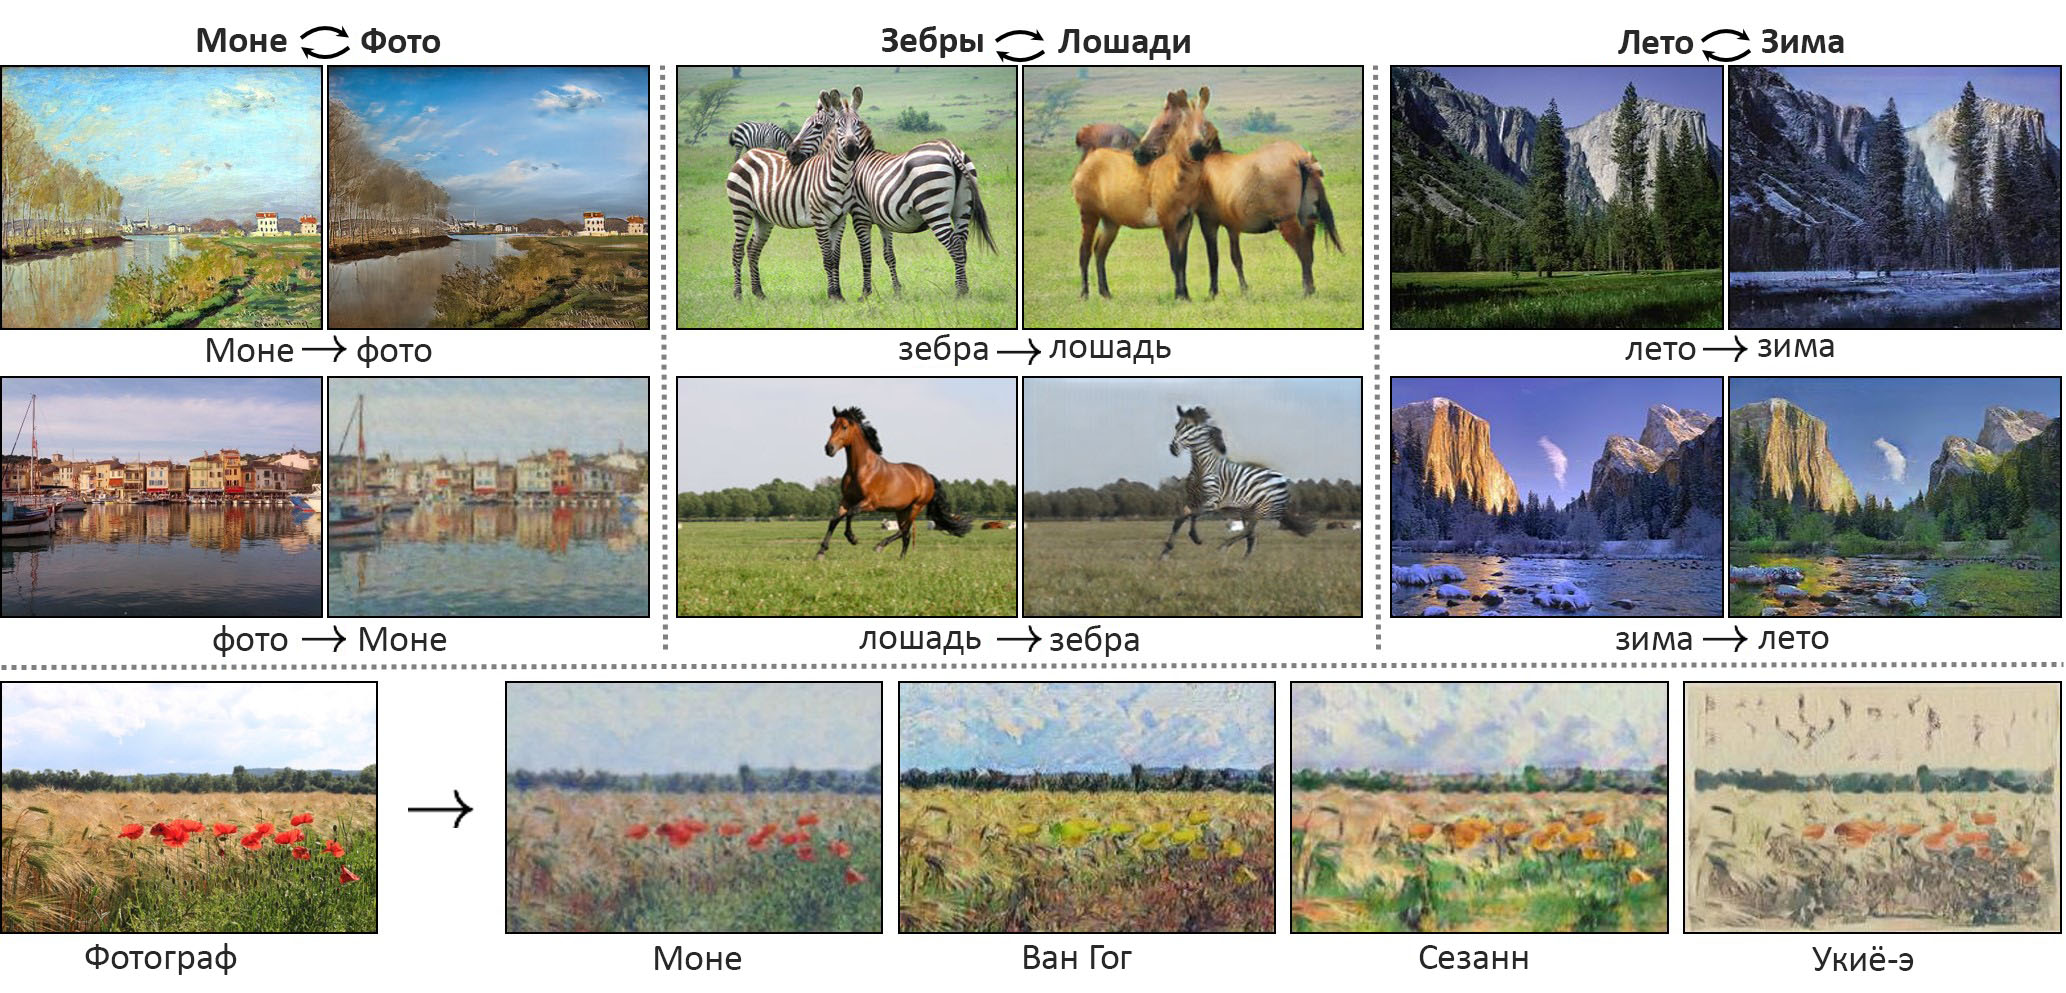

Преимущество модели CycleGAN в том, что ее можно обучать без парных примеров. То есть для обучения модели не требуются примеры фотографий до и после трансформации, например фотографии одного и того же городского пейзажа днем и ночью. Вместо этого он может использовать коллекцию фотографий из каждого набора (области), извлекать основной стиль (набор признаков) каждого из них и использовать для выполнения трансформации одного набора в другой и наоборот. 

<h2> <b>Что из себя представляет архитектура CycleGAN? </b></h2>

Архитектура **CycleGan** состоит из двух сетей генераторов:
* один генератор (Генератор-AB) для генерации изображений из набора А-->B
* второй генератор (Генератор-BA) для генерации изображений из набора В-->A
 
Т.е. функцией генератора является извлечение набора признаков (features) из обучающего набора изображений, и генерации изображений с похожими признаками.
 
Модели генераторов выполняют **преобразование** изображений, что означает, что процесс генерации изображения зависит от входного изображения, в частности изображения из другой области. Генератор-AB, в качестве входных данных, берет изображение из Набора-A, а Генератор-BA из Набора-B соответственно.

 

---


**Важно**  <br>
Модели Генераторов работают с вероятностным распределением и если речь идет о сверточных Генераторах, то мы имеем дело с распределением точек (пикселей) в двумерном пространстве. <br>
Т.е. каждый набор изображений имеет некое сходство и его вероятностное распределение будет ограничено некой областью. У другого набора изображений, другой областью. <br>
Т.е. к примеру, Генератор-АB будет выполнять трансформацию исходного (поданного на вход) изображения из набора-A, не в какое-то конкретное изображение из набора-B, а будет произведена такая трансформация, при которой текущее вероятностное распределение картинки из набора-A станет неотличимым от распределения в наборе-B.





---



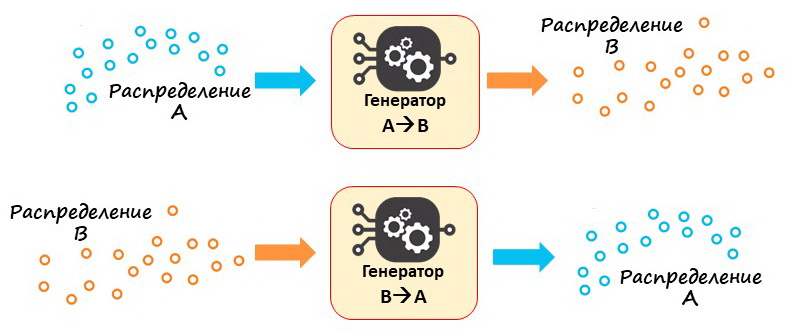

С каждым Генератором в паре работает своя модель Дискриминатора.

С Генератором АВ в паре работает Дискриминатор-B он обучается на реальных изображениях из набора-B. Когда ему на вход подают изображения сгенерированные Генератором-АB его задача, определить, настоящие они или поддельные. 

Аналогично с Генератором ВА в паре работает Дискриминатор-А, который берет реальные изображения из набора-А и сгенерированные изображения из Генератора-BА и предсказывает, настоящие они или поддельные.

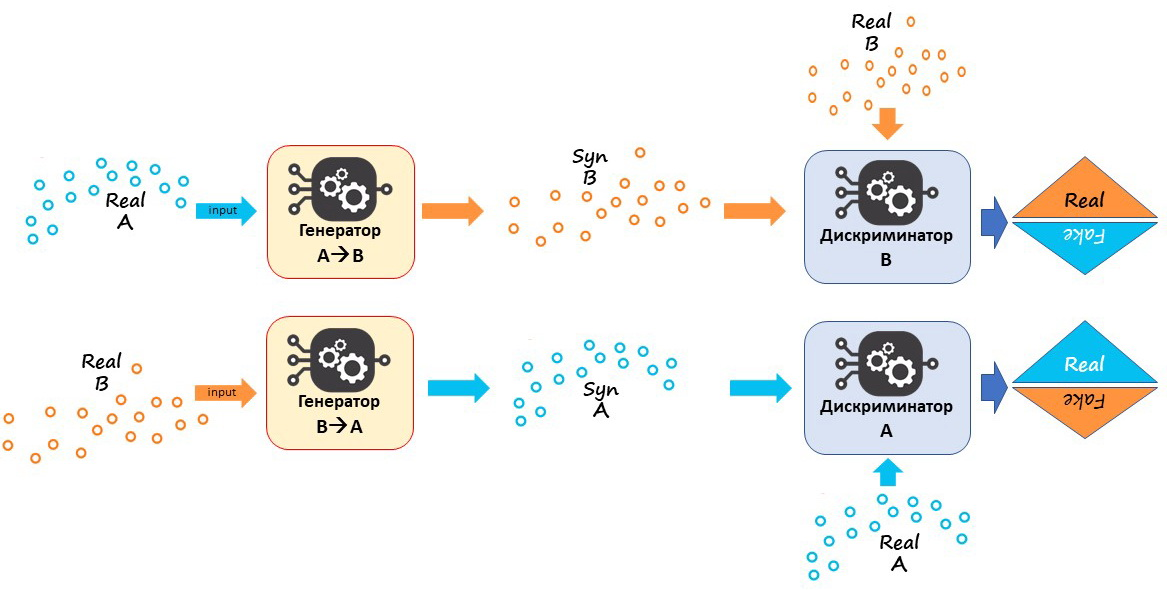

Модели дискриминатора и генератора обучаются в состязательном процессе, как и обычные модели GAN. Т.е. Генератор учится лучше обманывать Дискриминатор, а Дискриминатор лучше распознавать подделки. Если арихитектура моделей подобрана правильно, то в итоге система находит равновесие в процессе обучения.

<h2><b> Особенность CycleGan </b></h2>

> **Главная особенность CycleGan'a** заключается в том, что обе модели генераторов используются не только для создания новых изображений в целевом наборе, но и для воссоздания исходных изображений. То есть, сгенерированное первым генератором изображение снова подается на вход второму генератору, и на выходе мы, в идеале, должны получить "исходное" изображение. Такое изображение, прошедшее цикл, называется циклическим (Cyc_A или Cyc_B). Отсюда и название самого метода **CycleGAN**. Далее циклическое изображение сравнивается с исходным изображением и мы можем вычислить **Ошибку согласованности цикла (cycle consistency loss)**



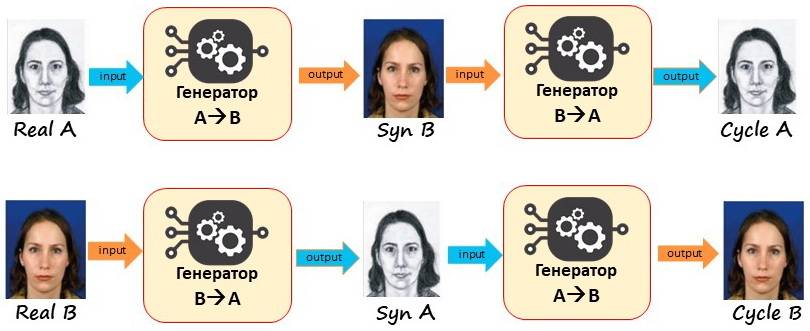

В архитектуре **CycleGAN** есть еще один элемент, называемый идентичным преобразованием.

Здесь на вход генератору подается изображение из целевого распределения (набора) и, мы ожидаем, что он сгенерирует то же изображение без изменений. Этот элемент в архитектуре является не обязательным, хотя он приводит к лучшему согласованию цветового профиля входного изображения.

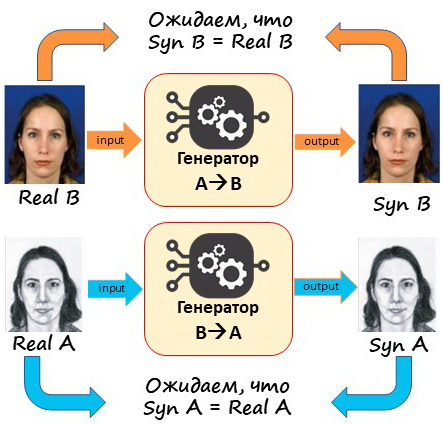

<h1><b>Дискриминатор CycleGAN</b></h1>

В официальной документации на CycleGAN разработчик указывает:
<blockquote>
<i>«Для сетей дискриминатора мы используем 70 × 70 PatchGAN, которые стремятся распознать, являются ли фрагменты изображения размером 70 × 70 настоящими или поддельными»</i>
</blockquote>

Принцип **PatchGAN** был разобран в занятии:

[Расширенный блок | GANs. Архитектура Pix2Pix (Теория) | УИИ](https://colab.research.google.com/drive/1lsljbxjiFsACmx8fe4wauit62V0RWeDF?usp=sharing)

Вспомним основные моменты: <br>
Дискриминатор анализирует не всё изображение целиком, а последовательно, его кусочки (патчи), отсюда и название модели. Дискриминатор оценивает каждый такой фрагмент изображения размером 70х70 пикселей и классифицирует их: поддельный или реальный. Далее все ответы усредняются, что бы получить окончательную оценку Дискриминатора.

<h2><b>Нормализация InstedNormalization</b></h2>

В модели CycleGAN не используется пакетная нормализация (BatchNormalization), вместо нее используют "поштучную" нормализацию - **Instance Normalization**


> InsteadNormalization была описана в статье 2016 года под названием [Instance Normalization: The Missing Ingredient for Fast Stylization.](https://arxiv.org/abs/1607.08022) («Нормализация образца: недостающий ингредиент для быстрой стилизации»). Это очень простой тип нормализации, включающий стандартизацию (например, масштабирование до стандартного гауссовского) значений на каждом наборе свойств. 



**Цель** такой нормализации состоит в том, что бы удалить информацию о контрасте, относящуюся к изображению, что приведет к созданию более качественных изображений.

        # Пример использования Instance Normalization
        from tensorflow_addons.layers.normalizations import InstanceNormalization
        # определяем слой
        layer = InstanceNormalization(axis=-1) # указываем ось: свойства будут нормализованы по всей карте признаков



<h2><b>Веса и ошибка дискриминатора</b></h2>

Веса сети инициализируются случайным гауссовским распределением со стандартным отклонением 0.02

Авторы архитектуры предлагают использовать функцию ошибки методом наименьших квадратов. Эта функция более стабильна во время обучения и дает более качественные результаты.

Это может быть реализовано с использованием «среднеквадратичной ошибки» MSE между целевыми значениями классов, class = 1 для реальных изображений и class = 0 для синтезированных изображений.

Кроме того, авторы предлагают разделить ошибку дискриминатора пополам во время обучения, что бы замедлить обновление дискриминатора по сравнению с генератором.

Этого можно добиться, задав для аргумента  “loss_weights” значение 0.5, при компиляции модели

        model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])

<h2><b>Создание PathcGAN-дискриминатора</b></h2>

В стандартных библиотеках Keras нет слоя **InstanceNormalization** <br>
Для его использования необходимо установить расширение <i>tensorflow-addons</i>, которое включает указанный слой

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 16.1 MB/s 


In [ ]:
from tensorflow.keras.optimizers import Adam # Импортируем оптимизатор
from tensorflow.keras.initializers import RandomNormal #Импортируем слой инициализации весов с номральным распределением
from tensorflow.keras.models import Model # Импортируем модели keras: Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose,Input, LeakyReLU, Activation, Concatenate, BatchNormalization # Импортируем стандартные слои keras
from tensorflow.keras.utils import plot_model # функция для отрисовки структуры модели

In [ ]:
from tensorflow_addons.layers import InstanceNormalization # Импортируем слой Instance нормализации

In [ ]:
# Слой инициализации весов
conv_init = RandomNormal(mean=0.0, stddev=0.02) # создаем ф-ю инициализации весов модели с определённым распределением

def CIL(layer, filters,
        in_layer = False,
        out_layer = False,
        kernel_size = (4,4),
        strides = (2,2),
        padding = 'same'):       
    if out_layer:
        x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=conv_init)(layer)
    else:
        x = Conv2D(filters, kernel_size, strides=strides, padding=padding, kernel_initializer=conv_init)(layer)
    if not in_layer:
        x = InstanceNormalization(axis=-1)(x)
    x = LeakyReLU(alpha=0.2) (x)
    return x

# определяем модель Дискриминатора
def ceate_discriminator(image_shape): 
  # Задаем воходной слой
  in_image = Input(shape=image_shape)
  # С64 сверточный слой, согласно спецификации, имеет 64 фильтра и ядро свертки 4х4, а так же шаг 2
  d = CIL(in_image, 64, in_layer = True)      # C64
  d = CIL(d, 128)                           # C128
  d = CIL(d, 256)                           # C256
  d = CIL(d, 512)                           # C512
  d = CIL(d, 512, out_layer = True)         # C512
  # Выходной слой
  out_dist = Conv2D(1, (4,4), padding='same', kernel_initializer=conv_init)(d)
  # Создаем модель
  model = Model(in_image, out_dist)
  '''Компилируем модель с параметрами указанными разработчиками CycleGan''' 
  model.compile(loss='mse', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss_weights=[0.5])
  return model

In [ ]:
# Определяем размер картинки
image_shape = (256, 256, 3)
# Создаем модель
discrim = ceate_discriminator(image_shape)
# Выводим информацию о дискриминаторе
discrim.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_82 (Conv2D)          (None, 128, 128, 64)      3136      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_83 (Conv2D)          (None, 64, 64, 128)       131200    
                                                                 
 instance_normalization_83 (  (None, 64, 64, 128)      256       
 InstanceNormalization)                                          
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                           

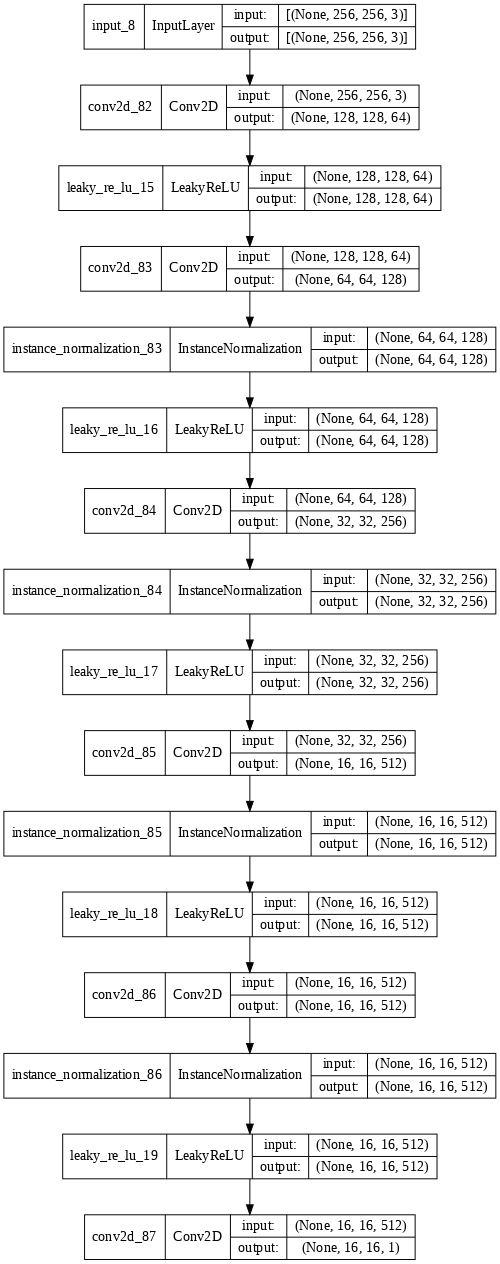

In [ ]:
# Выведем конфигурацию Дискриминатора
plot_model(discrim, to_file='discriminator_model_plot.png', dpi=70, show_shapes=True, show_layer_names=True)

<h1><b>CycleGAN Генератор</b></h1>

Модель генератора получает на вход изображение и генерирует трансформированное изображение, похожее на целевой набор.

Модель генератора представляет из себя:
1. Последовательность сверточных блоков с последовательным понижением разрешения
2. Серия Residual блоков (ResNet)
3. Последовательнолсть сверточных блоков с последовательным повышением разрешения, до исходного размера входного изображения

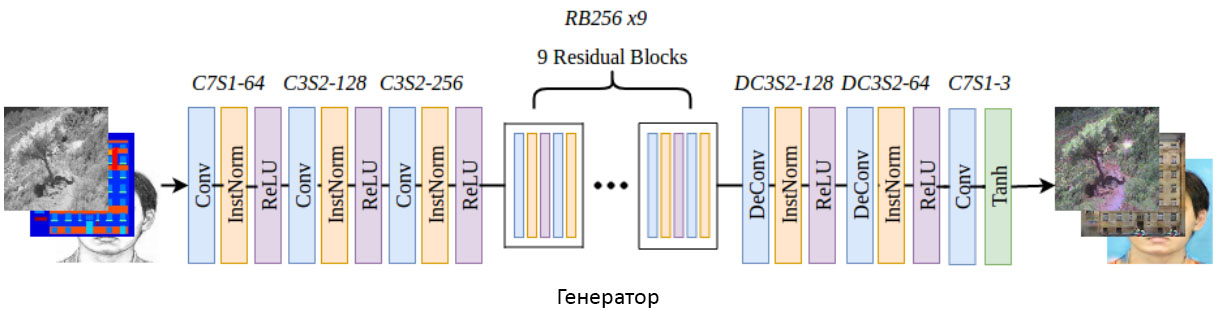

Количество Residual блоков варируется в зависимости от размера входного изображения. Для изображений с размером менее 256х256 пикселей предлагается использовать 6 Residual блоков, а для изображений с разрешением 256х256 и выше 9 блоков

<h2><b>Residual Block (блок остаточных данных)</b></h2>

> **Residual блок** - это блок состоящий из 2-х сверточных слоев с k-фильтрами, ядром свертки 3х3 и шагом 1 (stride), где входные данные блока объединяются с выходными по каналам

**Историчкский экскурс.**

*Разработчики сверточных сетей давно заметили, что если просто добавлять больше слоев, то качество такой модели растет до некоторого предела (смотрите VGG-19), а затем начинает падать. Такой эффект назвали - проблеммой деградации(degradation problem), а сети полученные простым добавлением большого количества слоев - plain или плоские. Но в 2015 году вышла работа [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) китайского подразделения Microsoft Research. Авторы предложили простой, на первый взгляд трюк, который приводит к неожиданным результатам.*

*Если мы возьмем некоторую сеть, например VGG-19, и добавим в нее еще слоев двадцать, то нам хотелось бы, чтобы глубокая сеть вела себя как минимум не хуже своего неглубокого аналога. Проблема деградации подразумевает, что сложная нелинейная функция , полученная добавлением нескольких слоев, должна выучить тождественное преобразование, в случае если на предыдущих слоях был достигнут предел качества. Но этого не происходит по каким-то причинам, возможно, оптимизатор просто не справляется с тем, чтобы настроить веса так, чтобы сложная нелинейная иерархическая модель делала тождественное преобразование.* 

*Было предложено добавить shortcut-соединение, и, возможно, оптимизатору будет легче сделать все веса близкими к нулю, нежели создавать тождественное преобразование. Ниже приведена схема остаточного блока*

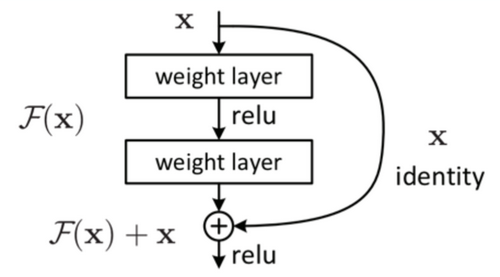

**Residual блоки** совершили революцию в построении глубоких сверточных сетей (Deep CNN). Благодаря добавлению Residual блоков можно улучшить качетсво любой сверточной сети.


Для удобства разработки, оформим наши **Residual-блоки** в виде отдельной функции:

In [ ]:
# Residual block
def resnet_block(n_filters, input_layer):
  # ф-я инициализация весов 
  init = RandomNormal(stddev=0.02) # инициализируем нормальное распределение со средним квадратичным отклонением 0,02
  # Первый сверточный слой
  r = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
  r = InstanceNormalization(axis=-1)(r)
  r = Activation('relu')(r)
  # Второй сверточный слой
  r = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(r)
  r = InstanceNormalization(axis=-1)(r)
  # Объединяем по каналам остаточную данные с входными
  r = Concatenate()([r, input_layer])
  return r

<h2><b>Модель генератора</b></h2>

Авторы предлагают следующую архитектуру генератора 

> <i>The network with 9 residual blocks consists of:<br>
c7s1-64, d128, d256, R256, R256, R256, R256, R256, R256, R256, R256, R256, u128
 u64, c7s1-3</i>

Определим функцию, которая создает вресию ResNet с 9-ю блоками для изображения 256х256 и более, при необходимости ее можно легко изменить на версию с 6-ю resnet блоками, установив image_shape = 128х128 и n_resnet = 6

In [ ]:
# Слой инициализации весов
conv_init = RandomNormal(mean=0.0, stddev=0.02) # создаем ф-ю инициализации весов модели с определённым распределением

def CIA(layer, 
        filters,
        down = True,
        kernel_size = (4,4),
        strides = (2,2),
        padding = 'same'):
    if down:
        ConvLayer =  Conv2D(filters, strides = strides, kernel_size=kernel_size, padding=padding, kernel_initializer=conv_init) (layer)
    else:
        ConvLayer =  Conv2DTranspose(filters, strides = strides, kernel_size=kernel_size, padding=padding, kernel_initializer=conv_init) (layer)
    x = InstanceNormalization(axis=-1)(ConvLayer)
    x = Activation('relu')(x)    
    return x

# Определяем стандартную модель Генератора
def create_generator(image_shape=(256,256,3), n_resnet=9):
    # Вход для картинки
    in_image = Input(shape=image_shape)
  
    g = CIA(in_image, filters=64, down=True, kernel_size=(7,7), strides=(1,1))        # c7s1-64 - первый CNN блок согласно документации 64 фильтра, ядро свертки 7х7, шаг 1
    g = CIA(g, filters=128, down=True, kernel_size=(3,3), strides=(2,2))              # d128 - второй CNN блок с понижением разрешения (downsampling), 128 фильтров, ядро 3х3, шаг 2
    g = CIA(g, filters=256, down=True, kernel_size=(3,3), strides=(2,2))              # d256 - третий CNN блок с понижением разрешения (downsampling), 256 фильтров, ядро 3х3, шаг 2
  
    # R256 Каскад Residual блоков построим ввиде функции:
    for _ in range(n_resnet): # Количество итераций задает число Residual блоков
        g = resnet_block(256, g) # Аргументы: количество фильтров, входные данные с предыдущего слоя

    g = CIA(g, filters=128, down=False, kernel_size=(3,3), strides=(2,2))             # U128 - Первый апсемлинг блок (с повышением разрешения) 128 фильтров, ядро 3х3, шаг2
    g = CIA(g, filters=64, down=False, kernel_size=(3,3), strides=(2,2))              # U64 - Второй апсемплинг блок (повышение разрешения) 64 фильтра, ядро 3х3, шаг2

    # C7s1-3 - Выходной слой с параметрами 3 фильтра (канала), ядро 7х7, шаг 1
    g = Conv2D(3, (7,7), padding='same', kernel_initializer=conv_init)(g)
    g = InstanceNormalization(axis=-1)(g)
    out_image = Activation('tanh')(g) # на выходном слое используем активацию tanh (вспоминаем, что картинка нормализуется с параметрами от -1 до 1)
    # Создаем модель
    model = Model(in_image, out_image)
    return model


In [ ]:
generator = create_generator(image_shape,9) # создаем генератор
generator.summary() # выводим информацию о генераторе

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_88 (Conv2D)             (None, 256, 256, 64  9472        ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 instance_normalization_87 (Ins  (None, 256, 256, 64  128        ['conv2d_88[0][0]']              
 tanceNormalization)            )                                                           



---



>Обратите внимание! Модель Генератора не компилируется, так как обучается при помощи составной модели CycleGAN, которую мы разберем ниже


---




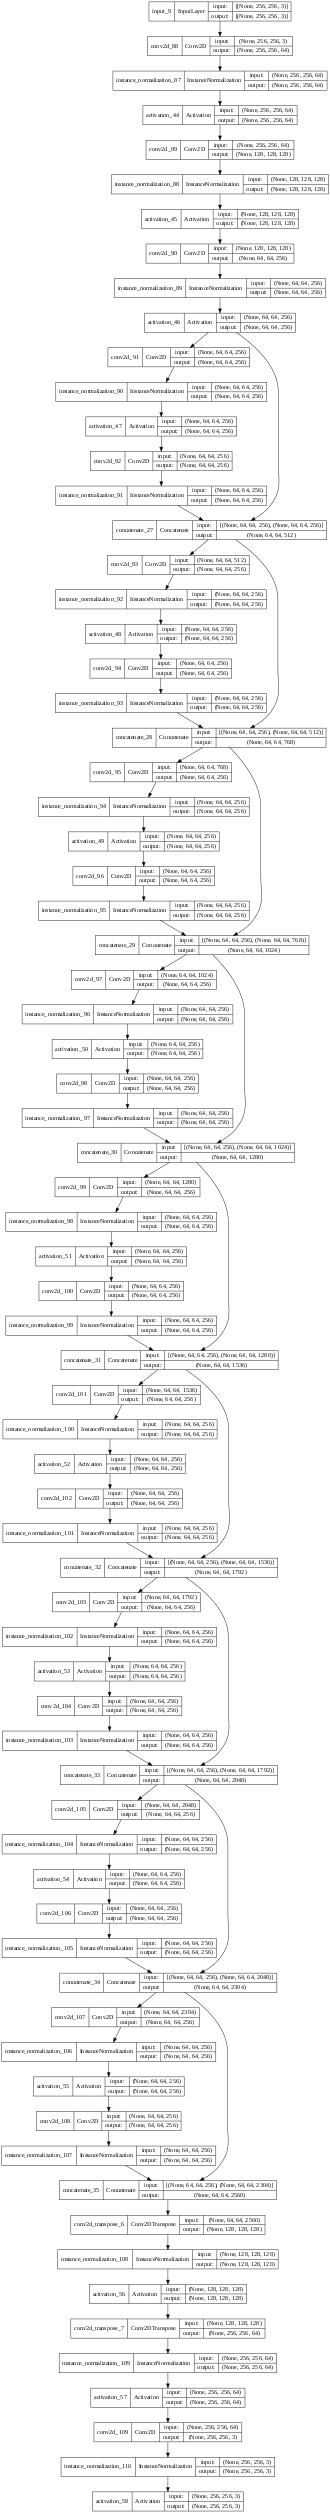

In [ ]:
# Посмотрим конфигурацию Генератора
plot_model(generator, to_file='generator_model_plot.png', dpi = 30, show_shapes=True, show_layer_names=True)

<h1><b>Составная модель CycleGAN</b></h1>

<h2><b>Функции ошибок</b></h2>

Так же как и в обычном GAN модели Генераторов обновляются с помощью составной модели. Обновление каждой модели генератора происходит на основе четырех функций ошибки:


> <li>Состязательная ошибка (<i>Adversarial loss (L2 или MSE)</i></li><li>Ошибка идентичности (<i>Identity loss (L1 или MAE)</li></i><li>Ошибка согласованности прямого цикла(<i>Forward cycle loss (L1 или MAE)</i></li><li>Ошибка согласованности обратного цикла(<i>Backward cycle loss (L1 или MAE)</i></li>



Использование состязательной ошибки (Adversarial loss) - это стандартный подход для обновления Генератора через Дискриминатор, но в этом случае, вместо функции отрицательной логарифмической вероятности, используется функция наименьших квадратов

Попробуем собрать единую модель

<h3><b>Шаг 1</b></h3>

С помощщью описанных ранее функций создаем модели генераторов (A->B и B->A):
        
        # Генератор A-->B
        gen_A2B = create_generator(image_shape, 9)
        # Генератор B-->A
        gen_B2A = create_generator(image_shape, 9)

А также модель соответствующих дискриминаторов:

        # Дискриминатор A --> [real/fake]
        d_model_A = ceate_discriminator(image_shape)
        # Дискриминатор B --> [real/fake]
        d_model_B = ceate_discriminator(image_shape)

Важно:



<i>Для каждой модели Генератора требуется составная модель, которая отвечает за обновления весов только этой модели. Но с другой стороны, для обучения Генератора требуется использовать веса и соответствующего Дискриминатора и второго Генератора. 
<br>Для того, что бы решить эту непростую, на первый взгляд задачу, мы просто "заморозим" веса моделей, которые в данный момент не обучаются, но учавствуют в процессе обучения. Как показано в примере ниже:</i>

        # Первый генератор обучается
        gen_A2B.trainable = True # модель текущего обучающегося генератора
        # парный ему Дискриминатор и второй Генератор "заморожены"
        d_model_A.trainable = False # модель текущего парного дискриминатора
        gen_B2A.trainable = False # модель второго генератора

<h3><b>Шаг 2</b></h3>

Создаем вход реального изображения из набора A, подключаем его к генератору, выход генератора подключаем к дискриминатору:

        # Элемент Дискриминатора
        input_gen = Input(shape=image_shape)
        gen1_out = gen_A2B(input_gen)
        output_d = d_model_B(gen1_out)

<h3><b>Шаг 3</b></h3>

На этом шаге мы создаем вход для блока сопоставленя **идентичности**, на который будет подаваться изображение из целевой выборки (набор B), проходить через наш генератор, а на его выходе должны получить (по возможности) не трасформированное входное изображение. (для рассчета той самой ошибки идентичности):

        # Блок идентичности
        input_id = Input(shape=image_shape) # на вход подаем картинку из целевого набора B
        output_id = gen_B2A(input_id) # на выходе должны получить (в идеале) туже картику без изменений

<h3><b>Шаг 4</b></h3>

На данный момент мы создали составную модель с двумя входами реального изображения, классификацией дискриминатора и выходом изображения идентичности. Теперь нам нужно добавить **циклы вперед и назад**.

Цикл вперед (forward cycle) заключается в том, что мы подаем выход генератора A2B на вход генератору B2A, на выходе которого должны получить (в идеале) тоже изображение, что подавлаи на вход генератоур A2B. 

Разницей в изображениях будет **Ошибка согласованности прямого цикла**
 <i>(Forward cycle loss)</i><br>

        Real_A--|A2B|-->Syn_B-->|B2A|-->Cyc_A
        Cyc_A~Real_A

        # Цикл вперед
        output_f = gen_B2A(gen1_out)

Обратный цикл более сложен и включает в себя ввод реального изображения из целевого набора Real_B, на вход генератор B2A, полученное изображение Syn_A мы подаем на вход первому генератору A2B и на выходе получаем изображение Cyc_B, которое должно соответствовать реальному изображению из набора B. Разницей в изображениях будет **Ошибка согласованности обратного цикла** <i>(Backward cycle loss)</i><br>

        Real_B-->|B2A|-->Syn_A-->|A2B|-->Cyc_B<br>
        Cyc_B~Real_B

        # Обратный цикл
        gen2_out = gen_B2A(input_id)
        output_b = gen_A2B(gen2_out)

<h3><b>Шаг 5 (Составная модель)</b></h3>

Теперь мы можем определить составную модель. У нее будет 2 входа: на них будет подаваться реальное изображение (предположим Real_А) для преобразования в целевой набор (Syn_B) и для "преобразования" в исходный набор Real_A' для проверки идентичности.

И четыре выхода: один для дискриминатора, один для генератора для отображения идентичности, один для другого генератора для прямого цикла, и один от нашего генератора для обратного цикла.

        # Определяем граф модели
        model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])

<h3><b>Шаг 5 (Компиляция модели)</b></h3>

Состязательная функция ошибки (Adversarial loss) для выхода дискриминатора использует ошибку наименьших квадратов L2 или среднеквадратичную ошибку MSE.
Выходные данные генераторов сравниваются с изображениями и оптимизируются с использованием ф-ции ошибки L1, реализованной как средняя абсолютная ошибка MAE.

Генератор обновляется с участием средневзвешенного значения четырех значений функций ошибки. Состязательная ошибка обычно применяется как есть, тогда как ошибки прямого и обратного цикла применяются с использованием коэффициента, называемого λ-лямбда, и устанавливается $λ=10$. Т.е. λ в 10 раз важнее, чем состязательная ошибка. Ошибка идентичности также применяется как часть параметра лямбда и устанавливается в $λ/2=5$

        # Компилируем модель с ошибками least squares loss и L1 loss и коэффициентами
        model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)

<h2><b> Сборка</b> </h2>

In [ ]:
# Объявляем функцию составной модели CycleGAN
def create_composite_model(gen_model_1, d_model, gen_model_2, image_shape):
 
  # Первый генератор обучается
  gen_model_1.trainable = True # модель текущего обучающегося генератора
  # парный ему Дискриминатор и второй Генератор "заморожены"
  d_model.trainable = False # модель текущего парного дискриминатора
  gen_model_2.trainable = False # модель второго генератора

  # Элемент Дискриминатора
  input_gen = Input(shape=image_shape)
  gen1_out = gen_model_1(input_gen)
  output_d = d_model(gen1_out)

  # Блок идентичности
  input_id = Input(shape=image_shape) # на вход подаем картинку из целевого набора B
  output_id = gen_model_2(input_id) # на выходе должны получить (в идеале) туже картику без изменений

  # Цикл вперед
  output_f = gen_model_2(gen1_out)

  # Обратный цикл
  gen2_out = gen_model_2(input_id)
  output_b = gen_model_1(gen2_out)

  # Определяем граф модели
  model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])

  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  # Компилируем модель с ошибками least squares loss и L1 loss и коэффициентами
  model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
  return model


Теперь эту функцию можно вызвать для подготовки составной модели для обучения генератора gen_A2B и gen_B2A:

        # составная модель: A -> B -> [real/fake, A]
        c_model_A2B = create_composite_model(gen_A2B, d_model_B, gen_B2A, image_shape)
        # составная модель: B -> A -> [real/fake, B]
        c_model_B2A = create_composite_model(gen_B2A, d_model_A, gen_A2B, image_shape)

Еще раз взглянем на схему того, что у нас получилось



<b>Составная модель Генератора c_model_A2B2A:</b><br>
<i><font size = '2'>Тренеруются только веса Генератора A2B, веса остальных моделей входящих в состав, "заморжены".
<font size = '3'>
> <li> <b><i>Adversarial Loss:</i></b> Real_A&rArr;Gen_A2B&rArr;Syn_B&rArr;Discr_B&rArr;[real/fake]<br><li> <b><i>Identity Loss:</i></b> Real_A&rArr;Gen_B2A&rArr;Real_A'<br><li><b><i>Forward Cycle Loss:</i></b> Real_A&rArr;Gen_A2B&rArr;Syn_B&rArr;Gen_B2A&rArr;Cyc_A<br><li><b><i>Backward Cycle Loss:</i></b> Real_B&rArr;Gen_B2A&rArr;Syn_A&rArr;Gen_A2B&rArr;Cyc_B<br>

<b>Составная модель Генератора c_model_B2A2B:</b><br>
<i><font size = '2'>Тренеруются только веса Генератора B2A, веса остальных моделей входящих в состав, "заморжены".
<font size = '3'>
> <li> <b><i>Adversarial Loss:</i></b> Real_B&rArr;Gen_B2A&rArr;Syn_A&rArr;Discr_A&rArr;[real/fake]<br><li> <b><i>Identity Loss:</i></b> Real_B&rArr;Gen_A2B&rArr;Real_B'<br><li><b><i>Forward Cycle Loss:</i></b> Real_B&rArr;Gen_B2A&rArr;Syn_A&rArr;Gen_B2A&rArr;Cyc_A<br><li><b><i>Backward Cycle Loss:</i></b> Real_A&rArr;Gen_A2B&rArr;Syn_B&rArr;Gen_B2A&rArr;Cyc_A<br>

**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/1YK1i5xr3XhNVM0jZPPyjq4TbA6yVeqhX?usp=sharing)